# Written Exercise 4.

What is the relationship between overfitting of the attacked model f (x) and the resulting attack success?
Evaluate and report results of both the shadow models attack and the naive baseline attack, one which always
guesses that correctly predicted instances were in training, and incorrectly guessed instances were not. As
part of this exercise you should analyze the attacks on CIFAR models that do not overfit as much as the one
shown in the starter code.


Your analysis of the results should include a measure of overfitting, attacker success rate, and a graphic
relating the two. You can find better models that do not overfit as much in Homework 2. You can also
analyze models that are reasonable unless they are trained for too many epochs at which point they start to
overfit.

In [6]:
import hw5_part1_utils

from typing import Tuple
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
from copy import copy

from tqdm import tqdm

from hw5_part1 import synthesize_attack_data, build_attack_models, evaluate_membership

data = hw5_part1_utils.CIFARData()


### Step 1. Build Naive Attack 

The naive attack takes y_pred and y and claims as part of the dataset (z=1) if (y_pred = y) and z=0 otherwise.

In [7]:
def naive_membership(y_pred, y):
    """Evaluate the attacker about the membership inference with naive method
    If y_pred = y, z = 1, z = 0 otherwise

    Arguments:

        y_pred {np.ndarray} -- an N x C numpy array with the predictions of the
          model on the N instances we are performing the inference attack on.

        y {np.ndarray} -- the true labels for each of the instances given as a
          numpy array of N integers.

    Returns:

        {np.ndarray} -- an array of N integer in the range [0,1] representing
          the estimated probability that each of the N given instances is a
          training set member.

    """

    # To return
    preds: np.ndarray = None

    # SOLUTION
    
    # 1. Get maximum axes for each of the y_pred
    y_pred_int = np.reshape(np.argmax(y_pred,axis=1),y.shape)
    
    # 2. Find where prediction and labels are equal
    preds = np.equal(y_pred_int, y) * 1
    
    # END OF SOLUTION

    return preds

### Step 2. Define mechanism for measuring "overfitting" of CIFAR model to be attacked

The metric I will choose is (train_acc - test_acc)^2. I will build a function that measures that.

In [8]:
def measure_overfit(target_model, X_train, y_train, X_test, y_test):
    """
    Measure overfitting by taking square difference of difference in accuracy in 
    test data and train data.
    """
    
    train_acc = target_model.model.evaluate(X_train, to_categorical(y_train),verbose=0)[1]
    test_acc = target_model.model.evaluate(X_test, to_categorical(y_test),verbose=0)[1]
    overfit_measure = (train_acc - test_acc)**2
    
    return overfit_measure
    

### Step 3. Find Many Different CIFAR Models and compare overfit measures

1. Original Model trained under 10, 20, 30, 40, 50 epochs
2. Obtain overfit metric

In [9]:
epoch_vals = [10, 20, 30, 40, 50]
models = []

for ep in epoch_vals:
    models += [hw5_part1_utils.CIFARModel(epochs = ep, batch_size = 2048)]
    models[-1].init(data.train, data.labels_train)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
overfits = []
for i in range(len(epoch_vals)):
    overfits += [measure_overfit(models[i], data.train[0:1000], data.labels_train[0:1000],
                              data.test, data.labels_test)]


In [13]:
for i in range(len(epoch_vals)):
    print("epochs:", epoch_vals[i], "overfit:", overfits[i])

epochs: 10 overfit: 0.01444803479572343
epochs: 20 overfit: 0.07524049494410523
epochs: 30 overfit: 0.14356518098382143
epochs: 40 overfit: 0.25532807525411627
epochs: 50 overfit: 0.2864390397958374


### 4. Measure performance of Naive and Shadow Attack Model

Accuracy of Z overall:
1000 points in train data
1000 points in test data

In [14]:
attack_models = []

for i in range(len(epoch_vals)):
    attack_models += [build_attack_models(
        models[i],
        data.shadow,
        data.labels_shadow
    )]


attack model no. 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7912 samples
Epoch 1/30
7912/7912 [==============================] - 0s 50us/sample - loss: 0.6940 - acc: 0.5095
Epoch 2/30
7912/7912 [==============================] - 0s 6us/sample - loss: 0.6925 - acc: 0.5148
Epoch 3/30
7912/7912 [==============================] - 0s 6us/sample - loss: 0.6902 - acc: 0.5316
Epoch 4/30
7912/7912 [==============================] - 0s 5us/sample - loss: 0.6898 - acc: 0.5334
Epoch 5/30
7912/7912 [==============================] - 0s 5us/sample - loss: 0.6894 - acc: 0.5340
Epoch 6/30
7912/7912 [==============================] - 0s 6us/sample - loss: 0.6894 - acc: 0.5355
Epoch 7/30
7912/7912 [==============================] - 0s 7us/sample - loss: 0.6887 - acc: 0.5423
Epoch 8/30
7912/7912 [==============================] - 0s 6us/sample - loss: 0.6893 - acc: 0.5345
Epoch 9/30
7912/7912 [==============================] - 0s 6us/sample -

7900/7900 [==============================] - 0s 6us/sample - loss: 0.6849 - acc: 0.5520
Epoch 18/30
7900/7900 [==============================] - 0s 6us/sample - loss: 0.6849 - acc: 0.5558
Epoch 19/30
7900/7900 [==============================] - 0s 5us/sample - loss: 0.6856 - acc: 0.5532
Epoch 20/30
7900/7900 [==============================] - 0s 4us/sample - loss: 0.6841 - acc: 0.5597
Epoch 21/30
7900/7900 [==============================] - 0s 5us/sample - loss: 0.6836 - acc: 0.5565
Epoch 22/30
7900/7900 [==============================] - 0s 5us/sample - loss: 0.6829 - acc: 0.5568
Epoch 23/30
7900/7900 [==============================] - 0s 5us/sample - loss: 0.6828 - acc: 0.5615
Epoch 24/30
7900/7900 [==============================] - 0s 5us/sample - loss: 0.6823 - acc: 0.5648
Epoch 25/30
7900/7900 [==============================] - 0s 5us/sample - loss: 0.6834 - acc: 0.5589
Epoch 26/30
7900/7900 [==============================] - 0s 5us/sample - loss: 0.6842 - acc: 0.5576
Epoch 27/30


8068/8068 [==============================] - 0s 5us/sample - loss: 0.6870 - acc: 0.5464
Epoch 9/30
8068/8068 [==============================] - 0s 5us/sample - loss: 0.6870 - acc: 0.5514
Epoch 10/30
8068/8068 [==============================] - 0s 6us/sample - loss: 0.6852 - acc: 0.5519
Epoch 11/30
8068/8068 [==============================] - 0s 6us/sample - loss: 0.6849 - acc: 0.5522
Epoch 12/30
8068/8068 [==============================] - 0s 6us/sample - loss: 0.6863 - acc: 0.5431
Epoch 13/30
8068/8068 [==============================] - 0s 6us/sample - loss: 0.6858 - acc: 0.5504
Epoch 14/30
8068/8068 [==============================] - 0s 6us/sample - loss: 0.6838 - acc: 0.5509
Epoch 15/30
8068/8068 [==============================] - 0s 6us/sample - loss: 0.6866 - acc: 0.5423
Epoch 16/30
8068/8068 [==============================] - 0s 6us/sample - loss: 0.6865 - acc: 0.5480
Epoch 17/30
8068/8068 [==============================] - 0s 6us/sample - loss: 0.6851 - acc: 0.5444
Epoch 18/30
8

7912/7912 [==============================] - 0s 4us/sample - loss: 0.6598 - acc: 0.6004
Epoch 21/30
7912/7912 [==============================] - 0s 5us/sample - loss: 0.6613 - acc: 0.5952
Epoch 22/30
7912/7912 [==============================] - 0s 4us/sample - loss: 0.6609 - acc: 0.5967
Epoch 23/30
7912/7912 [==============================] - 0s 5us/sample - loss: 0.6586 - acc: 0.5993
Epoch 24/30
7912/7912 [==============================] - 0s 5us/sample - loss: 0.6623 - acc: 0.5945
Epoch 25/30
7912/7912 [==============================] - 0s 4us/sample - loss: 0.6621 - acc: 0.5952
Epoch 26/30
7912/7912 [==============================] - 0s 5us/sample - loss: 0.6581 - acc: 0.5974
Epoch 27/30
7912/7912 [==============================] - 0s 5us/sample - loss: 0.6600 - acc: 0.6009
Epoch 28/30
7912/7912 [==============================] - 0s 4us/sample - loss: 0.6610 - acc: 0.5943
Epoch 29/30
7912/7912 [==============================] - 0s 5us/sample - loss: 0.6603 - acc: 0.5925
Epoch 30/30


7968/7968 [==============================] - 0s 5us/sample - loss: 0.6392 - acc: 0.6317
Epoch 12/30
7968/7968 [==============================] - 0s 5us/sample - loss: 0.6373 - acc: 0.6383
Epoch 13/30
7968/7968 [==============================] - 0s 5us/sample - loss: 0.6316 - acc: 0.6443
Epoch 14/30
7968/7968 [==============================] - 0s 5us/sample - loss: 0.6354 - acc: 0.6386
Epoch 15/30
7968/7968 [==============================] - 0s 5us/sample - loss: 0.6328 - acc: 0.6360
Epoch 16/30
7968/7968 [==============================] - 0s 5us/sample - loss: 0.6355 - acc: 0.6364
Epoch 17/30
7968/7968 [==============================] - 0s 5us/sample - loss: 0.6364 - acc: 0.6298
Epoch 18/30
7968/7968 [==============================] - 0s 5us/sample - loss: 0.6351 - acc: 0.6338
Epoch 19/30
7968/7968 [==============================] - 0s 5us/sample - loss: 0.6319 - acc: 0.6396
Epoch 20/30
7968/7968 [==============================] - 0s 5us/sample - loss: 0.6298 - acc: 0.6392
Epoch 21/30


Epoch 2/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6843 - acc: 0.5587
Epoch 3/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6783 - acc: 0.5860
Epoch 4/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6744 - acc: 0.5913
Epoch 5/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6714 - acc: 0.5892
Epoch 6/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6665 - acc: 0.5932
Epoch 7/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6680 - acc: 0.5926
Epoch 8/30
7944/7944 [==============================] - 0s 7us/sample - loss: 0.6625 - acc: 0.6051
Epoch 9/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6645 - acc: 0.5959
Epoch 10/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6623 - acc: 0.5966
Epoch 11/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6635 - acc: 0.5957
Epoch 12

8196/8196 [==============================] - 0s 7us/sample - loss: 0.5963 - acc: 0.6761
Epoch 15/30
8196/8196 [==============================] - 0s 6us/sample - loss: 0.5930 - acc: 0.6711
Epoch 16/30
8196/8196 [==============================] - 0s 7us/sample - loss: 0.5892 - acc: 0.6836
Epoch 17/30
8196/8196 [==============================] - 0s 12us/sample - loss: 0.5921 - acc: 0.6748
Epoch 18/30
8196/8196 [==============================] - 0s 10us/sample - loss: 0.5897 - acc: 0.6809
Epoch 19/30
8196/8196 [==============================] - 0s 10us/sample - loss: 0.5940 - acc: 0.6731
Epoch 20/30
8196/8196 [==============================] - 0s 11us/sample - loss: 0.5940 - acc: 0.6789
Epoch 21/30
8196/8196 [==============================] - 0s 9us/sample - loss: 0.5912 - acc: 0.6773
Epoch 22/30
8196/8196 [==============================] - 0s 8us/sample - loss: 0.5898 - acc: 0.6813
Epoch 23/30
8196/8196 [==============================] - 0s 12us/sample - loss: 0.5858 - acc: 0.6813
Epoch 2

7944/7944 [==============================] - 0s 7us/sample - loss: 0.6146 - acc: 0.6542
Epoch 26/30
7944/7944 [==============================] - 0s 7us/sample - loss: 0.6070 - acc: 0.6610
Epoch 27/30
7944/7944 [==============================] - 0s 7us/sample - loss: 0.6059 - acc: 0.6594
Epoch 28/30
7944/7944 [==============================] - 0s 6us/sample - loss: 0.6086 - acc: 0.6591
Epoch 29/30
7944/7944 [==============================] - 0s 7us/sample - loss: 0.6054 - acc: 0.6640
Epoch 30/30
7944/7944 [==============================] - 0s 7us/sample - loss: 0.6046 - acc: 0.6623
attack model no. 7
Train on 8164 samples
Epoch 1/30
8164/8164 [==============================] - 1s 81us/sample - loss: 0.6829 - acc: 0.5747
Epoch 2/30
8164/8164 [==============================] - 0s 7us/sample - loss: 0.6650 - acc: 0.6244
Epoch 3/30
8164/8164 [==============================] - 0s 7us/sample - loss: 0.6493 - acc: 0.6572
Epoch 4/30
8164/8164 [==============================] - 0s 7us/sample - l

Epoch 16/30
8056/8056 [==============================] - 0s 8us/sample - loss: 0.5904 - acc: 0.6723
Epoch 17/30
8056/8056 [==============================] - 0s 8us/sample - loss: 0.5867 - acc: 0.6756
Epoch 18/30
8056/8056 [==============================] - 0s 7us/sample - loss: 0.5821 - acc: 0.6889
Epoch 19/30
8056/8056 [==============================] - 0s 7us/sample - loss: 0.5854 - acc: 0.6866
Epoch 20/30
8056/8056 [==============================] - 0s 9us/sample - loss: 0.5882 - acc: 0.6810
Epoch 21/30
8056/8056 [==============================] - 0s 8us/sample - loss: 0.5845 - acc: 0.6753
Epoch 22/30
8056/8056 [==============================] - 0s 8us/sample - loss: 0.5815 - acc: 0.6841
Epoch 23/30
8056/8056 [==============================] - 0s 8us/sample - loss: 0.5840 - acc: 0.6841
Epoch 24/30
8056/8056 [==============================] - 0s 8us/sample - loss: 0.5818 - acc: 0.6888
Epoch 25/30
8056/8056 [==============================] - 0s 8us/sample - loss: 0.5808 - acc: 0.6828


8000/8000 [==============================] - 0s 7us/sample - loss: 0.5551 - acc: 0.7130
Epoch 28/30
8000/8000 [==============================] - 0s 7us/sample - loss: 0.5563 - acc: 0.7089
Epoch 29/30
8000/8000 [==============================] - 0s 7us/sample - loss: 0.5532 - acc: 0.7135
Epoch 30/30
8000/8000 [==============================] - 0s 7us/sample - loss: 0.5518 - acc: 0.7163
attack model no. 5
Train on 8068 samples
Epoch 1/30
8068/8068 [==============================] - 1s 101us/sample - loss: 0.6772 - acc: 0.5713
Epoch 2/30
8068/8068 [==============================] - 0s 7us/sample - loss: 0.6530 - acc: 0.6605
Epoch 3/30
8068/8068 [==============================] - 0s 8us/sample - loss: 0.6330 - acc: 0.6962
Epoch 4/30
8068/8068 [==============================] - 0s 9us/sample - loss: 0.6189 - acc: 0.6930
Epoch 5/30
8068/8068 [==============================] - 0s 9us/sample - loss: 0.6005 - acc: 0.6994
Epoch 6/30
8068/8068 [==============================] - 0s 8us/sample - lo

Epoch 18/30
8164/8164 [==============================] - 0s 9us/sample - loss: 0.5538 - acc: 0.7134
Epoch 19/30
8164/8164 [==============================] - 0s 9us/sample - loss: 0.5530 - acc: 0.7129
Epoch 20/30
8164/8164 [==============================] - 0s 10us/sample - loss: 0.5525 - acc: 0.7126
Epoch 21/30
8164/8164 [==============================] - 0s 9us/sample - loss: 0.5532 - acc: 0.7139
Epoch 22/30
8164/8164 [==============================] - 0s 8us/sample - loss: 0.5510 - acc: 0.7119
Epoch 23/30
8164/8164 [==============================] - 0s 8us/sample - loss: 0.5450 - acc: 0.7171
Epoch 24/30
8164/8164 [==============================] - 0s 10us/sample - loss: 0.5504 - acc: 0.7161
Epoch 25/30
8164/8164 [==============================] - 0s 9us/sample - loss: 0.5520 - acc: 0.7146
Epoch 26/30
8164/8164 [==============================] - 0s 8us/sample - loss: 0.5512 - acc: 0.7146
Epoch 27/30
8164/8164 [==============================] - 0s 8us/sample - loss: 0.5461 - acc: 0.718

7900/7900 [==============================] - 0s 8us/sample - loss: 0.4666 - acc: 0.7771
Epoch 30/30
7900/7900 [==============================] - 0s 8us/sample - loss: 0.4627 - acc: 0.7754
attack model no. 3
Train on 7968 samples
Epoch 1/30
7968/7968 [==============================] - 1s 135us/sample - loss: 0.6830 - acc: 0.5427
Epoch 2/30
7968/7968 [==============================] - 0s 9us/sample - loss: 0.6476 - acc: 0.6802
Epoch 3/30
7968/7968 [==============================] - 0s 7us/sample - loss: 0.6137 - acc: 0.7392
Epoch 4/30
7968/7968 [==============================] - 0s 8us/sample - loss: 0.5798 - acc: 0.7519
Epoch 5/30
7968/7968 [==============================] - 0s 7us/sample - loss: 0.5459 - acc: 0.7587
Epoch 6/30
7968/7968 [==============================] - 0s 9us/sample - loss: 0.5255 - acc: 0.7569
Epoch 7/30
7968/7968 [==============================] - 0s 8us/sample - loss: 0.5064 - acc: 0.7646
Epoch 8/30
7968/7968 [==============================] - 0s 7us/sample - loss

7792/7792 [==============================] - 0s 9us/sample - loss: 0.5943 - acc: 0.6661
Epoch 11/30
7792/7792 [==============================] - 0s 9us/sample - loss: 0.5876 - acc: 0.6691
Epoch 12/30
7792/7792 [==============================] - 0s 9us/sample - loss: 0.5835 - acc: 0.6736
Epoch 13/30
7792/7792 [==============================] - 0s 9us/sample - loss: 0.5826 - acc: 0.6709
Epoch 14/30
7792/7792 [==============================] - 0s 10us/sample - loss: 0.5767 - acc: 0.6762
Epoch 15/30
7792/7792 [==============================] - 0s 9us/sample - loss: 0.5726 - acc: 0.6840
Epoch 16/30
7792/7792 [==============================] - 0s 9us/sample - loss: 0.5739 - acc: 0.6772
Epoch 17/30
7792/7792 [==============================] - 0s 9us/sample - loss: 0.5757 - acc: 0.6748
Epoch 18/30
7792/7792 [==============================] - 0s 9us/sample - loss: 0.5708 - acc: 0.6819
Epoch 19/30
7792/7792 [==============================] - 0s 9us/sample - loss: 0.5739 - acc: 0.6794
Epoch 20/30

In [15]:
# Predict each of the labels
y_pred_ins = []
y_pred_outs= []

for i in range(len(epoch_vals)):
    target_model = models[i]
    y_pred_in = target_model.predict(data.train)
    y_pred_out = target_model.predict(data.test)
    y_pred_ins += [y_pred_in]
    y_pred_outs += [y_pred_out]

In [16]:
# Evaluate membership of each using the naive and evaluate membership methods

model_in_preds_shadow = []
model_out_preds_shadow = []

model_in_preds_naive = []
model_out_preds_naive = []

for i in range(len(epoch_vals)):
    # Naive membership attack
    model_in_preds_naive += [naive_membership(y_pred_ins[i],data.labels_train)]
    model_out_preds_naive += [naive_membership(y_pred_outs[i],data.labels_test)]
    
    
    # Shadow membership attack
    model_in_preds_shadow += [evaluate_membership(
                        attack_models[i],
                        y_pred_in,
                        data.labels_train
                    )]
    model_out_preds_shadow += [evaluate_membership(
                        attack_models[i],
                        y_pred_out,
                        data.labels_test
                    )]

In [23]:
# Obtain accuracy of each of the attack methods
true_positives_shadow = []
true_negatives_shadow = []
accuracies_shadow = []

true_positives_naive = []
true_negatives_naive = []
accuracies_naive = []


for i in range(len(epoch_vals)):
    true_positives_shadow += [(model_in_preds_shadow[i] > 0.5).mean()]
    true_negatives_shadow += [(model_out_preds_shadow[i] < 0.5).mean()]
    accuracies_shadow += [(true_positives_shadow[i] + true_negatives_shadow[i]) / 2.]
    
    true_positives_naive += [(model_in_preds_naive[i] > 0.5).mean()]
    true_negatives_naive += [(model_out_preds_naive[i] < 0.5).mean()]
    accuracies_naive += [(true_positives_naive[i] + true_negatives_naive[i]) / 2.]

### Step 5. Plot of the overfitting measure vs. the accuracies of each of the approaches

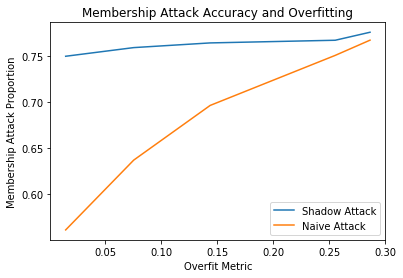

In [24]:
import matplotlib.pyplot as plt

plt.plot(overfits, accuracies_shadow, label = "Shadow Attack")
plt.plot(overfits, accuracies_naive, label = "Naive Attack")
plt.xlabel('Overfit Metric')
plt.ylabel('Membership Attack Proportion')
plt.title('Membership Attack Accuracy and Overfitting')
plt.legend()
plt.show()